<a href="https://colab.research.google.com/github/Dario-Caf/Dario_CMPDA/blob/parallelism_MachineLearning/Machine_Learning/ML_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.layers import Input, Dense, Dropout, Flatten
from keras.models import Model
from math import *

# Machine learning assignment 1
Create a **classifier** using either a shallow Neural Network (such as MLP with a single hidden layer) or a Deep Network.
The classifier can take as input some user generated data, e.g. a partition of the [0,1]x[0,1] square.

Use Keras docs as needed https://keras.io/api/


Generating and representing the dataset.

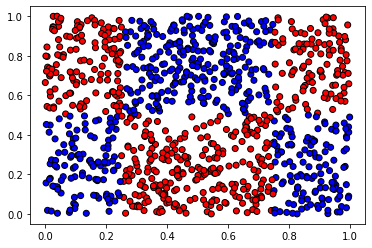

In [57]:
N = 1000
np.random.seed(123)
x1 = 1.0 * np.random.rand(N)
x2 = 1.0 * np.random.rand(N)
X = np.stack((x1,x2), axis=1)

function = lambda x1,x2 :  np.sin(2*pi * x2)*np.cos(2*pi * x1) > 0
y = function(x1,x2) 

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), 
            edgecolors='k')
   

Let's compare with a colormap made using directly the generating function.

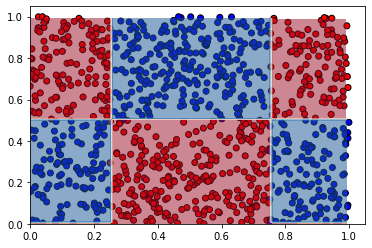

In [58]:
xx1, xx2 = np.meshgrid(np.arange(0, 1, 0.01),np.arange(0, 1, 0.01))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), 
            edgecolors='k')
plt.contourf(xx1, xx2, (function(xx1,xx2)).reshape(xx1.shape), 
             cmap=plt.cm.RdBu, alpha=0.5)

Generating the MLP and printing its characteristics.

In [59]:

inputs = Input(shape=(X.shape[1],))
hidden = Dense(100, activation='relu')(inputs)
outputs = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()


Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


Splitting the validation dataset in two parts (0.5). The first is for the training phase and the second for the validation one. In the history object a history.history dictionary contains the validation and training loss vs epoch.

---






In [60]:
history = model.fit(X,y,validation_split=0.5,epochs=500,verbose=0) 

dict_keys(['loss', 'val_loss'])


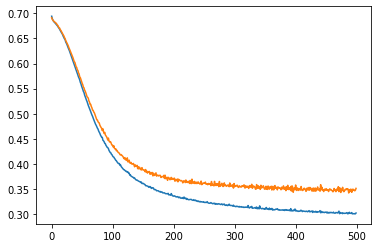

In [61]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])



Now let's try to evaluate our model on the xx1 and xx2 points we created earlier

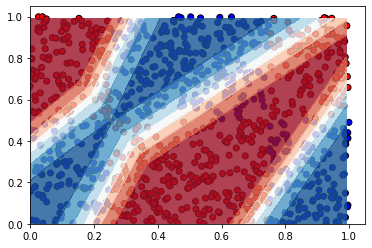

In [62]:
 
testSet = np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
pred = model.predict(testSet)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), 
            edgecolors='k')
plt.contourf(xx1, xx2, pred.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)

Now let's try to create a deep network instead with about the same number of parameters as the MLP above. Let's try with 4 hidden layers, how many nodes per layers are needed?

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_44 (Dense)             (None, 15)                45        
_________________________________________________________________
dense_45 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_47 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 6         
Total params: 376
Trainable params: 376
Non-trainable params: 0
_______________________________________________________

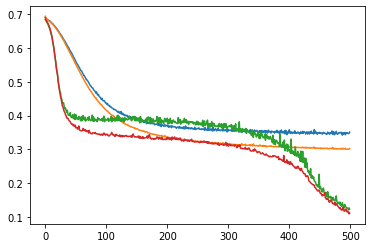

In [63]:

inputs=Input(shape=(2,))
x = Dense(15, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(5, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

deepmodel = Model(inputs=inputs, outputs=outputs)
deepmodel.compile(loss='binary_crossentropy', optimizer='adam')
deepmodel.summary()
deephistory=deepmodel.fit(X,y,validation_split=0.5,epochs=500, verbose=0)

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.plot(deephistory.history["val_loss"])
plt.plot(deephistory.history["loss"])
plt.show()

# Machine learning assignment 2
Let’s try to implement a regression with DNN in keras:
*   Invent a function of x1, x2, x3, x4, x5;
*   Generate some data;
*   Create a Feed Forward model (with 1 or more hidden layers);
*   Try to make a histogram of the residuals on the validation sample.

In [4]:
N=1000
np.random.seed(123)
x1 = 1.0 * np.random.rand(N)
x2 = 1.0 * np.random.rand(N)
x3 = 1.0 * np.random.rand(N)
x4 = 1.0 * np.random.rand(N)
x5 = 1.0 * np.random.rand(N)
X=np.stack((x1,x2,x3,x4,x5), axis=1) 

function = lambda x1,x2,x3,x4,x5 : (np.cos(x1*10)+x2**x3)*x4
y=function(x1,x2,x3,x4,x5) 

In [ ]:
for i in range(5) :
  for j in range(i+1,5) :
 #   print(i,j)
    plt.figure()
    plt.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.RdBu, edgecolors='k')

Creating the neural network with only one hidden layer.

In [6]:
inputs = Input(shape=(5,))
hidden = Dense(500, activation='relu')(inputs)
outputs = Dense(1, activation='linear')(hidden) 
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='MSE', optimizer='adam') 
model.summary()



Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 500)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


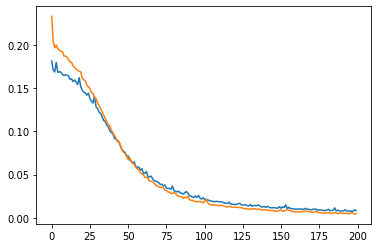

In [7]:
#This time we split the X,y upfront
nsplit = int(N/2)
X_tr = X[:nsplit, :]
X_val = X[nsplit:, :]
y_tr = y[:nsplit]
y_val = y[nsplit:]
#NB: you can use scikit learn to shuffle, coherently X and y, and split 

history = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=200, verbose=0)

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()

(500, 1)


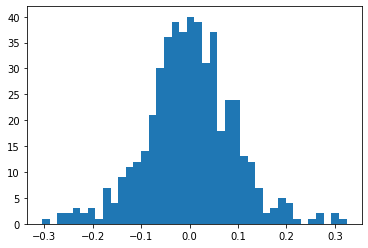

In [29]:
y_pred_val = model.predict(X_val)

#Note that the shape of the prediction is a bit strange
print(y_pred_val.shape)

#pred = y_pred_val.reshape(y_val.shape)  ----?
residuals = y_pred_val[:, 0] - y_val
plt.hist(residuals, 40)
plt.show()


Creating a deep network.

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                300       
_________________________________________________________________
dense_19 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_20 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
Total params: 3,431
Trainable params: 3,431
Non-trainable params: 0
_________________________________________________________________


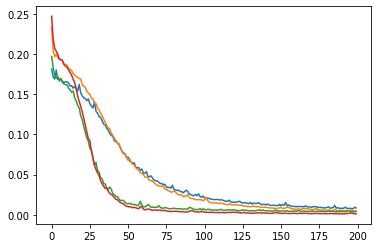

In [30]:
inputs = Input(shape=(5,))
x = Dense(50, activation='relu')(inputs)
x = Dense(30, activation='relu')(x)
x = Dense(50, activation='relu')(x)
outputs = Dense(1, activation='linear')(x)
deepmodel = Model(inputs=inputs, outputs=outputs)
deepmodel.summary()
deepmodel.compile(loss='MSE', optimizer='adam')
deephistory = deepmodel.fit(X_tr, y_tr, validation_data=(X_val, y_val), 
                            epochs=200, verbose=0)

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.plot(deephistory.history["val_loss"])
plt.plot(deephistory.history["loss"])
plt.show()

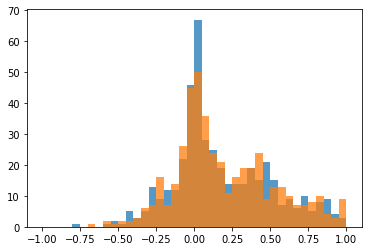

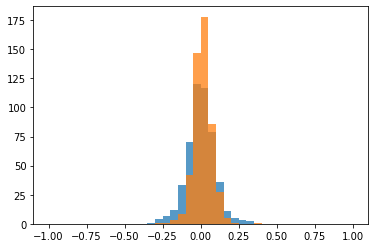

In [33]:
y_pred_val_deep = deepmodel.predict(X_val)
residuals_deep=y_pred_val_deep[:,0] - y_val

plt.hist(y_val, 40, range=[-1,1], alpha=0.75)
plt.hist(y_pred_val_deep, 40, range=[-1,1], alpha=0.75)
plt.show()
plt.hist(residuals, 40, range=[-1,1], alpha=0.75)
plt.hist(residuals_deep, 40, range=[-1,1], alpha=0.75)
plt.show()